In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [9]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

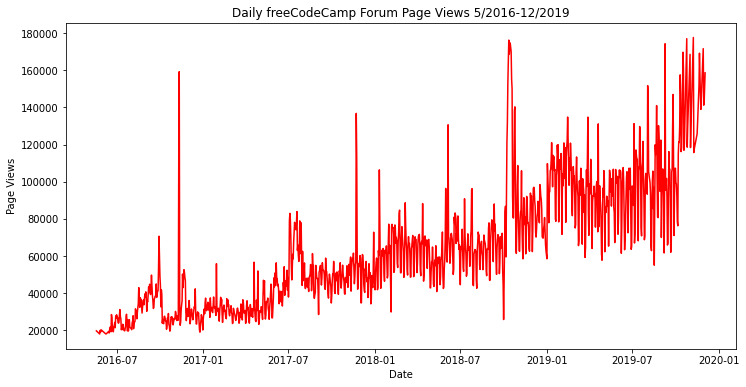

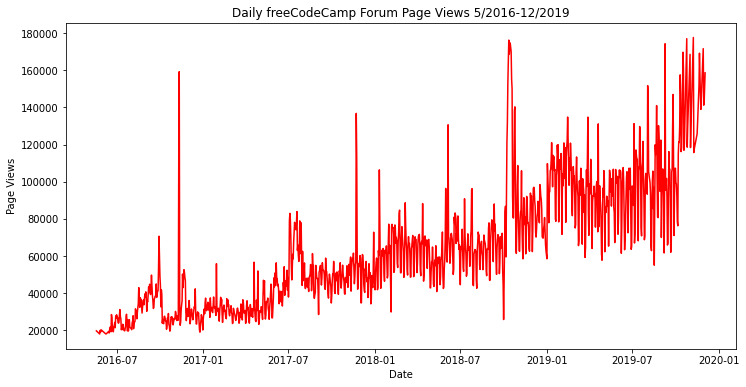

In [10]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(df.index, df['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_ylabel('Page Views')
    ax.set_xlabel('Date')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

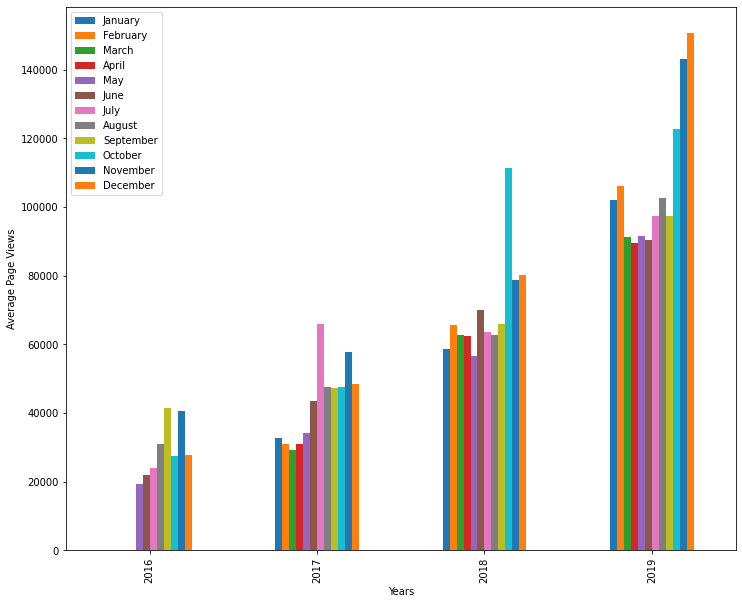

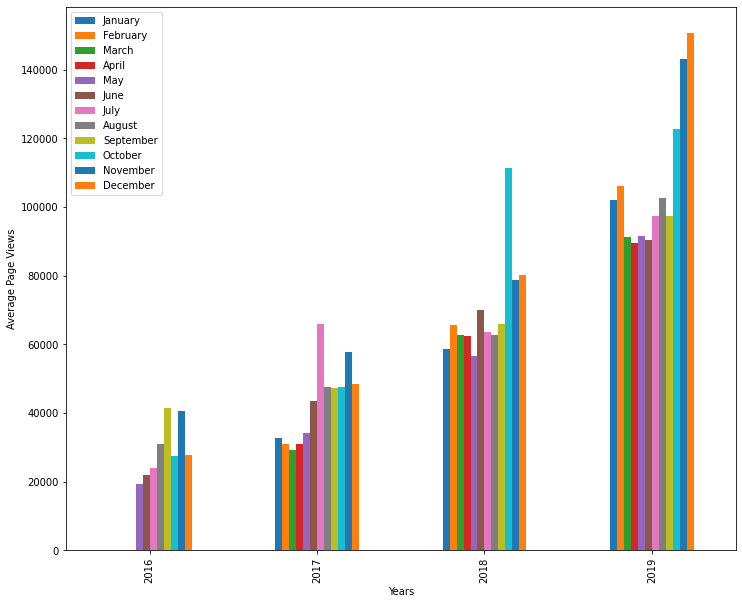

In [11]:

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy().copy()
    df_bar = df_bar.groupby([df_bar.index.year.rename('year'), df_bar.index.month]).mean()
    df_bar = df_bar.pivot_table(index='year', columns='date', values='value', fill_value=0)

    # Draw bar plot
    fig = df_bar.plot.bar(figsize=(12,10), legend=True, xlabel='Years', ylabel='Average Page Views',)
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    fig = fig.figure
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()


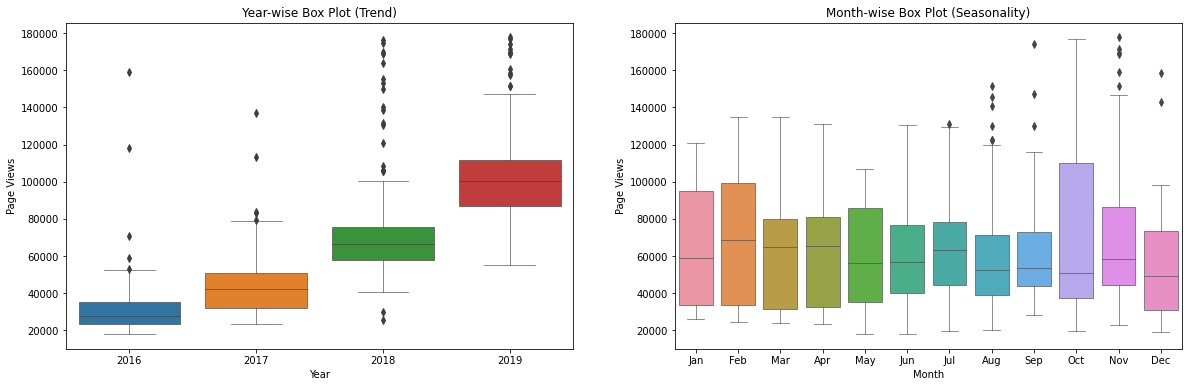

In [12]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['months'] = df_box.date.dt.month
    df_box = df_box.sort_values('months')
    fig, axes = plt.subplots(1,2, figsize=(20,6))
    sns.boxplot(ax=axes[0], data=df_box, x='year', y='value', linewidth=0.6)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    axes[0].set_title('Year-wise Box Plot (Trend)')
    sns.boxplot(ax=axes[1], data=df_box, x='month', y='value', linewidth=0.6)
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    axes[1].set_title('Month-wise Box Plot (Seasonality)')

    fig = fig.figure

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


draw_box_plot()